Building RF model simple

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Load your file
df_numeric = pd.read_excel('numeric_conversion.xlsx', sheet_name='numeric_data')

# Step 3: Prepare data
df_numeric_clean = df_numeric.drop(columns=['Unnamed: 0', '2b_time_enroll', '3.1.1b_name_drug1', '8.1f_liver>2cm', '8.1g_increase_hct'], errors='ignore')
for col in df_numeric_clean.columns:
    df_numeric_clean[col] = pd.to_numeric(df_numeric_clean[col], errors='coerce')

X_bleeding = df_numeric_clean[['8.1d_mucosa,_bleed', '3.21a_Neuro_Symp', '8.1e_lethargy/rest', '2.1d_pulse', '2f_wt(kg)']]
y_bleeding = df_numeric_clean['3.12a_bleeding']

X_bleeding = X_bleeding[y_bleeding.notna()].fillna(0)
y_bleeding = y_bleeding[y_bleeding.notna()]

# Step 4: Build tuned Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_bleeding, y_bleeding)

# Step 5: Predict and Evaluate
y_pred = rf_model.predict(X_bleeding)

print("Confusion Matrix:")
print(confusion_matrix(y_bleeding, y_pred))
print("\nClassification Report:")
print(classification_report(y_bleeding, y_pred))


/Users/hemanta/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Confusion Matrix:
[[1563   37]
 [   5    9]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1600
         1.0       0.20      0.64      0.30        14

    accuracy                           0.97      1614
   macro avg       0.60      0.81      0.64      1614
weighted avg       0.99      0.97      0.98      1614



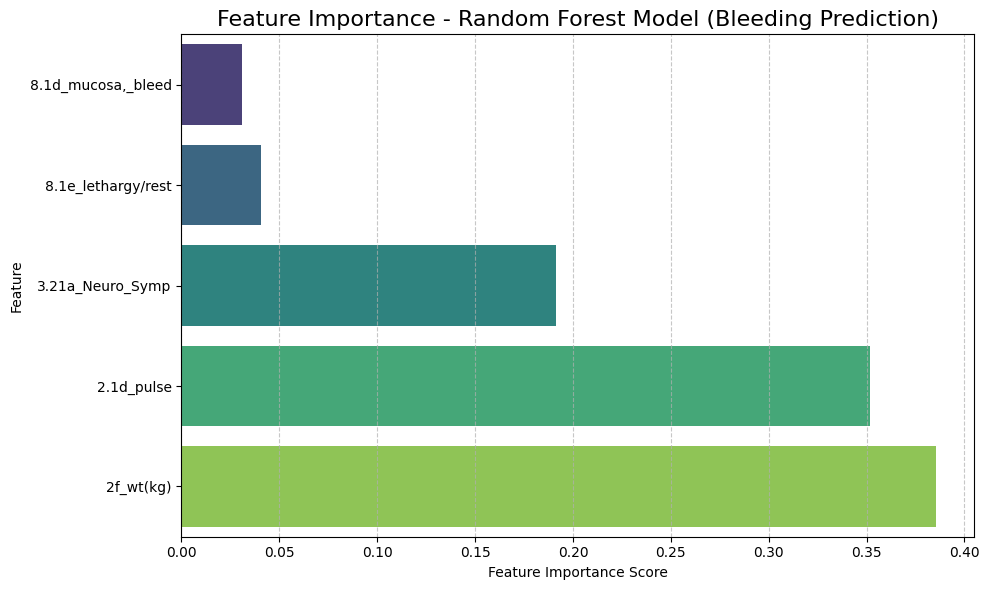

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Get feature importances (after model trained)
feature_importances = rf_model.feature_importances_

# Step 2: Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_bleeding.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)  # ascending for nice top-to-bottom bar plot

# Step 3: Fancy Seaborn plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Model (Bleeding Prediction)', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


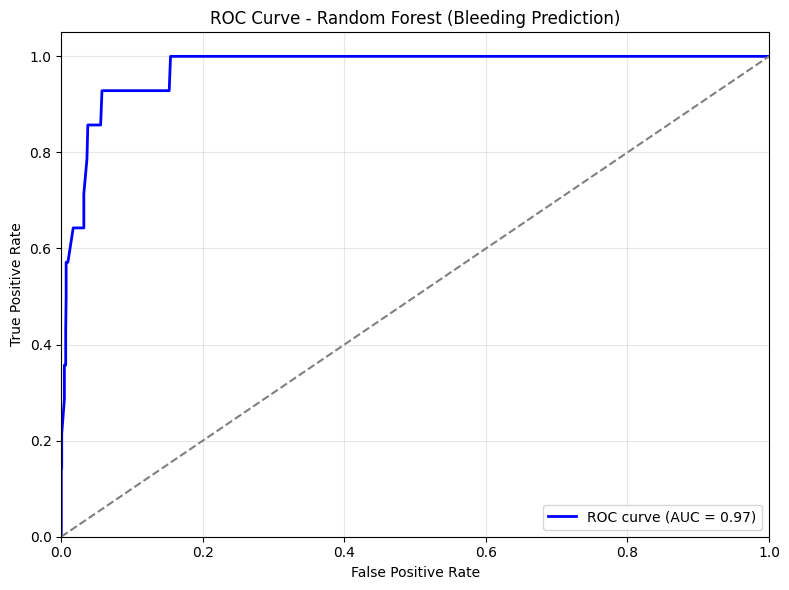

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get prediction probabilities for the positive class (Bleeding = 1)
y_prob = rf_model.predict_proba(X_bleeding)[:, 1]

# Step 2: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_bleeding, y_prob)

# Step 3: Calculate AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Bleeding Prediction)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The blue curve shows model's performance.

The diagonal grey dashed line shows random guessing.

The farther your curve is above the diagonal, the better your model is.

AUC (Area Under the Curve) tells model performance:

0.5 = random

0.7–0.8 = fair

0.8–0.9 = good

0.9–1.0 = excellent